<a href="https://colab.research.google.com/github/TAUforPython/fuzzy/blob/main/fuzzy_regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy least square method

In [1]:
!pip install -U git+https://github.com/TAUforPython/fuzz-regression.git

  Cloning https://github.com/TAUforPython/fuzz-regression.git to /tmp/pip-req-build-qvbm9n40
  Running command git clone --filter=blob:none --quiet https://github.com/TAUforPython/fuzz-regression.git /tmp/pip-req-build-qvbm9n40
  Resolved https://github.com/TAUforPython/fuzz-regression.git to commit 459813823890cf535fd3dff07dd42bb5cde1ee77
  Preparing metadata (setup.py) ... done
  Created wheel for fuzzy_regression: filename=fuzzy_regression-0.0.2-py3-none-any.whl size=7711 sha256=590412a6c557b313b8b10ed6658dfda591ce709e9dd9c20818b8679acf6435f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-4cg7a8vk/wheels/a0/ae/c1/a12eac4441f83872763c7f2591ed51a6e2753935ec8a0b4f12
Successfully built fuzzy_regression


In [2]:
from fuzzy_regression import Regression

In [3]:
def fuz_sym_lin_reg_QP_expert(list_of_coordinates, h, k1=1, k2=1):

    n = len(list_of_coordinates[0])-1
    new_list = [(1, *c) for c in list_of_coordinates]

    # caching sum to access later
    sum_matrix = []
    for x in range(n+2):
        row = []
        for y in range(n+2):
            row.append(sum([i[x]*i[y]*h[num]
                            for num, i in enumerate(new_list)]))
        sum_matrix.append(row)

    Q_matrix = []
    for j in range(n+1):
        row = []
        # line c
        for i in range(n+1):
            row.append(k2*sum_matrix[j][i])
            row.append(0.)  # a
        Q_matrix.append(row)

        row = []
        # line a
        for i in range((n+1)):
            row.append(0.)  # c
            row.append(k1*sum_matrix[j][i])
        Q_matrix.append(row)

    Q = np.array(Q_matrix) * 2

    p_vector = []
    for j in range(n+1):
        p_vector.append(0.)  # c
        p_vector.append(-2*sum_matrix[n+1][j]*k1)
    p = np.array(p_vector)

    # Gh
    G_buffer = []
    h_buffer = []

    for num, el in enumerate(new_list):
        # lower then upper
        row = []
        for j in range(n+1):
            row.append(-(1-h[num])*el[j])
            row.append(el[j])
        G_buffer.append(row)
        h_buffer.append(el[n+1])

        # higher then lower
        row = []
        for j in range(n+1):
            row.append(-(1-h[num])*el[j])
            row.append(-el[j])
        G_buffer.append(row)
        h_buffer.append(-el[n+1])

    # c_j >= 0
    for j in range(n+1):
        row = []
        for i in range(n+1):
            if i == j:
                row.append(-1.)
                row.append(0.)
            else:
                row.append(0.)
                row.append(0.)
        G_buffer.append(row)
        h_buffer.append(0.)

    G = np.array(G_buffer)
    h = np.array(h_buffer)

    res = cvxopt_solve_qp(Q, p, G, h)
    return SymLinearSolution(c=res[::2], a=res[1::2])

In [46]:
example2_keys = [1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.]
example2_values = [7., 8., 8., 12., 9., 10., 7., 10., 11., 12., 12., 13.]
example2 = list(zip(example2_keys, example2_values))
example2_expert = [0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8]
#example2_expert = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8]

In [39]:
#reg = Regression.of(list(zip(x,y)))
reg = Regression.of(example2)

sym.lin.LP
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  2.6645e-15  5e+01  4e-01  2e-16  1e+00
 1:  2.1567e+01  2.1825e+01  2e+01  2e-01  6e-17  7e-01
 2:  2.9085e+01  2.9143e+01  5e+00  4e-02  7e-16  2e-01
 3:  3.1562e+01  3.1569e+01  4e-01  4e-03  1e-15  2e-02
 4:  3.1871e+01  3.1871e+01  5e-03  5e-05  8e-16  2e-04
 5:  3.1875e+01  3.1875e+01  5e-05  5e-07  5e-14  2e-06
 6:  3.1875e+01  3.1875e+01  5e-07  5e-09  5e-14  2e-08
Optimal solution found.


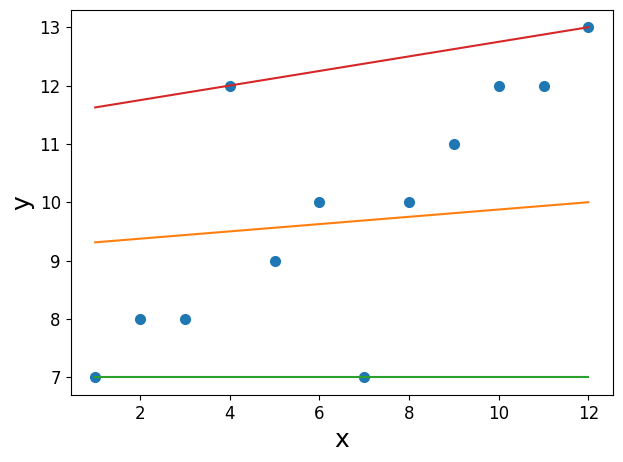

In [47]:
print('sym.lin.LP')
reg.symmetric.linear_LP().plot().show()

sym.lin.QP_exp
     pcost       dcost       gap    pres   dres
 0: -8.4504e+02 -8.0164e+02  4e+02  4e-01  2e-01
 1: -7.9009e+02 -8.0063e+02  1e+02  8e-02  3e-02
 2: -7.5235e+02 -7.6610e+02  2e+01  1e-02  4e-03
 3: -7.4380e+02 -7.5739e+02  2e+01  4e-03  2e-03
 4: -7.4364e+02 -7.5142e+02  1e+01  2e-03  9e-04
 5: -7.4466e+02 -7.5177e+02  9e+00  1e-03  5e-04
 6: -7.4444e+02 -7.4558e+02  1e+00  9e-05  3e-05
 7: -7.4445e+02 -7.4447e+02  2e-02  1e-06  4e-07
 8: -7.4446e+02 -7.4446e+02  2e-04  1e-08  4e-09
Optimal solution found.


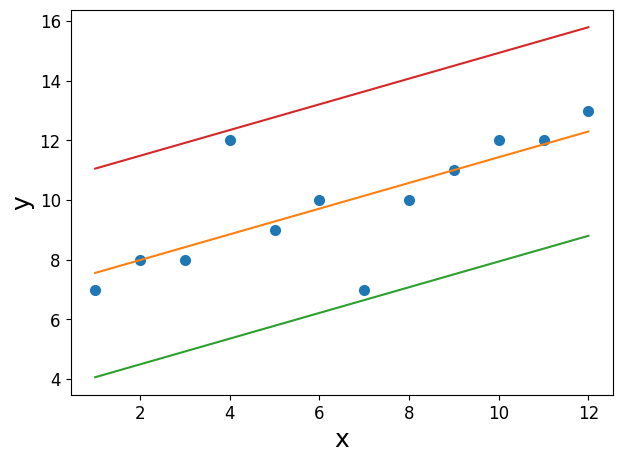

In [48]:
print('sym.lin.QP_exp')
reg.symmetric.linear_QP_expert(example2_expert).plot().show()

asym.lin.QP
     pcost       dcost       gap    pres   dres
 0: -1.2074e+03 -1.1642e+03  4e+02  4e-01  3e-01
 1: -1.1811e+03 -1.2349e+03  1e+02  1e-01  7e-02
 2: -1.1602e+03 -1.1808e+03  3e+01  2e-02  1e-02
 3: -1.1545e+03 -1.1721e+03  3e+01  1e-02  7e-03
 4: -1.1534e+03 -1.1541e+03  1e+00  3e-04  2e-04
 5: -1.1533e+03 -1.1533e+03  2e-02  6e-06  3e-06
 6: -1.1533e+03 -1.1533e+03  2e-04  6e-08  3e-08
Optimal solution found.


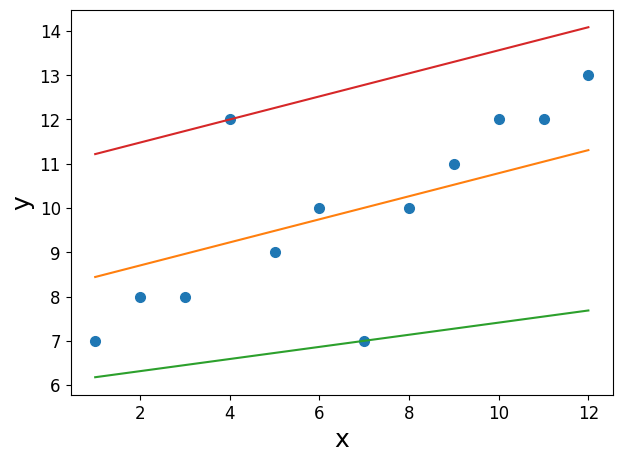

In [49]:
# asym
print('asym.lin.QP')
reg.asymmetric.linear_QP().plot().show()

# Ordinary Least Square Method

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [10]:

def datasets_make_regression(coef, data_size, noise_sigma, random_state):
    x = np.arange(0, data_size, 1.)
    mu = 0.0
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size, 1))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = coef[0] + coef[1]*x[i] + noise[i]

    return x, y

Text(0, 0.5, 'y (экспериментальные измерения)')

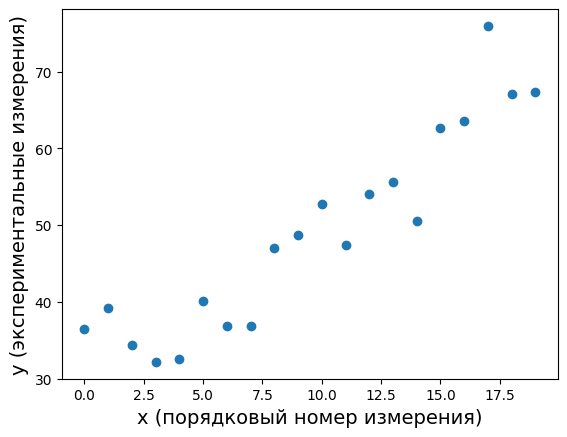

In [11]:
coef_true = [30, 2] # весовые коэффициенты
data_size = 20 # размер генерируемого набора данных
noise_sigma = 5 # СКО шума в данных
random_state = 1
x, y = datasets_make_regression(coef_true, data_size, noise_sigma, random_state)

plt.plot(x, y, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (экспериментальные измерения)', fontsize=14)

[29.49861233] [2.05870809]


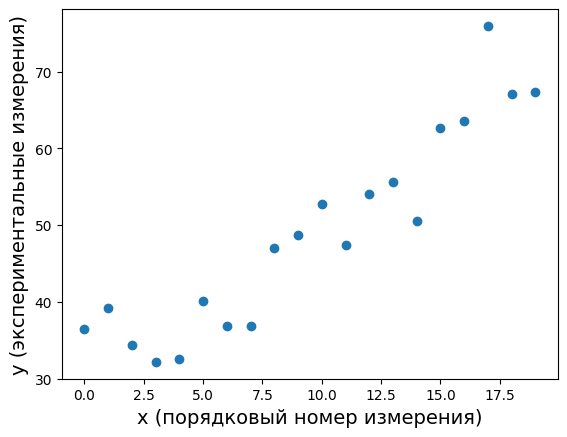

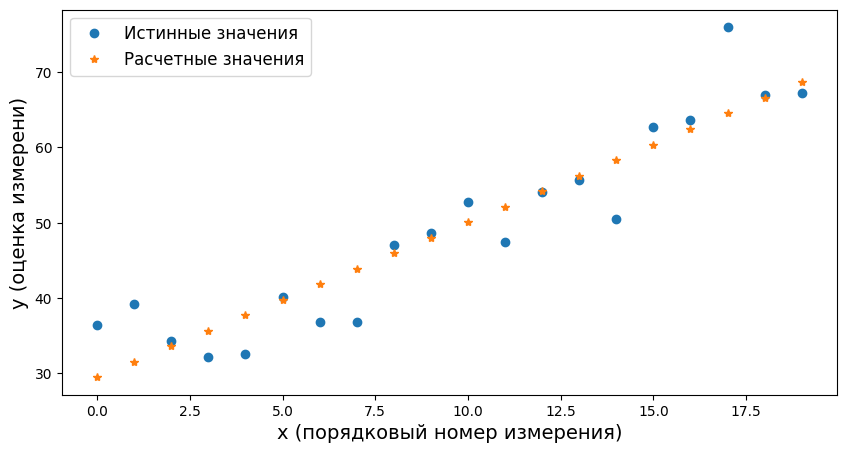

In [9]:

def coefficient_reg_stat(x, y):
    size = len(x)
    avg_x = sum(x)/len(x) # оценка МО величины x
    avg_y = sum(y)/len(y) # оценка МО величины y
    # оценка МО величины x*y
    avg_xy = sum(x[i]*y[i] for i in range(0,size))/size
    # оценка СКО величины x
    std_x = (sum((x[i] - avg_x)**2 for i in range(0,size))/size)**0.5
    # оценка СКО величины y
    std_y = (sum((y[i] - avg_y)**2 for i in range(0,size))/size)**0.5
    # оценка коэффициента корреляции величин x и y
    corr_xy = (avg_xy - avg_x*avg_y)/(std_x*std_y)

    # расчет искомых коэффициентов
    w1 = corr_xy*std_y/std_x
    w0 = avg_y - avg_x*w1
    return w0, w1

[coeffA, coeffB] = coefficient_reg_stat(x, y)
print(coeffA, coeffB)
def predict(w0, w1, x_scale):
    y_pred = [w0 + val*w1 for val in x_scale]
    return y_pred

y_predict = predict(coeffA, coeffB, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label = 'Истинные значения')
plt.plot(x, y_predict, '*', label = 'Расчетные значения')
plt.legend(loc = 'best', fontsize=12)
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка измерени)', fontsize=14)
plt.show()

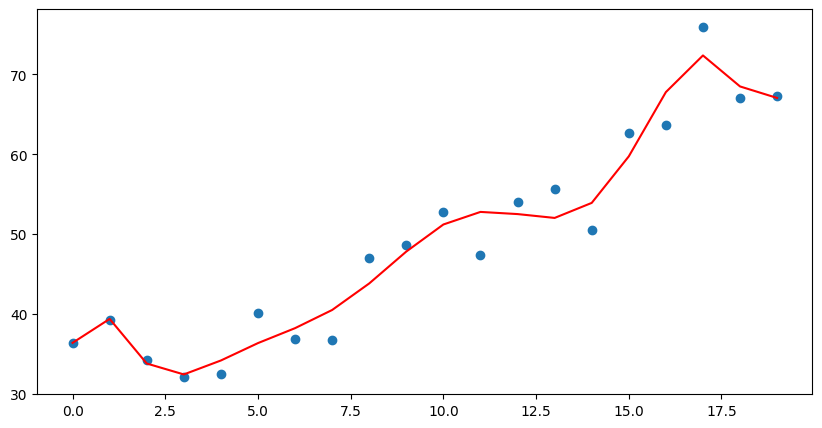

In [7]:
from sklearn.preprocessing import PolynomialFeatures
# specifying the degree of the polynomial
poly = PolynomialFeatures(degree=9, include_bias=False)
# creating a new feature
poly_features = poly.fit_transform(x.reshape(-1,1))
# creating a polynomial regression model
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,y)
y_predicted = poly_reg_model.predict(poly_features)
# depicting the polynomial graph
plt.figure(figsize=(10, 5))
plt.scatter(x,y)
plt.plot(x, y_predicted, c='red')
plt.show()